In [47]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

width = 12
height = 7
plt.rcParams["figure.figsize"] = (width, height)


import pandas as pd
import numpy as np
import tflscripts
import json
from sklearn.metrics import accuracy_score

configuration = tflscripts.read_configuration()
df = pd.read_pickle('results.p')

In [48]:
# filter only without transfer
df = df.loc[df.source_dataset == df.target_dataset]
df = df.loc[df.source_device == df.target_device]
df = df.loc[df.source_placement == df.target_placement]

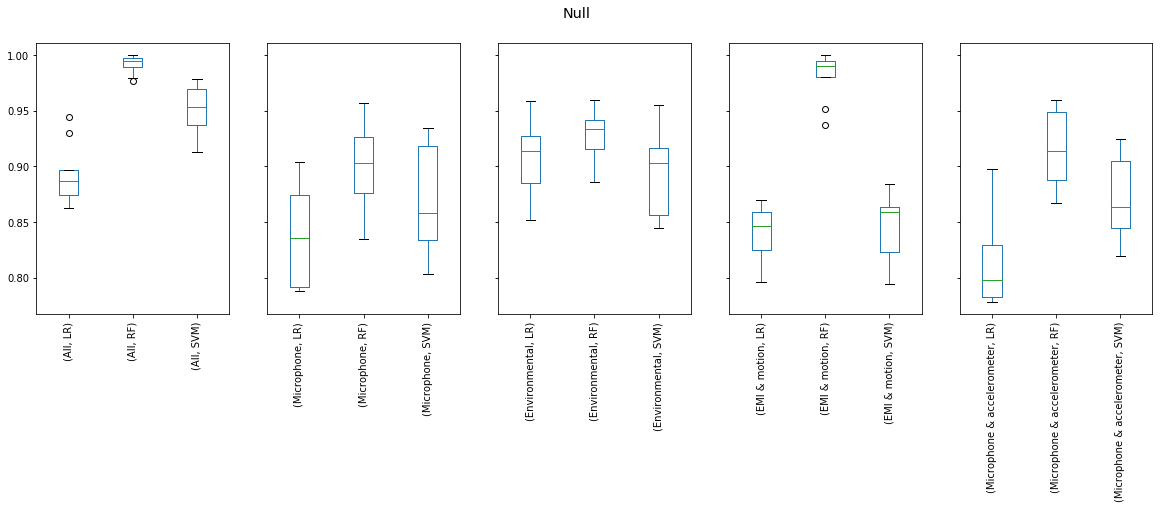

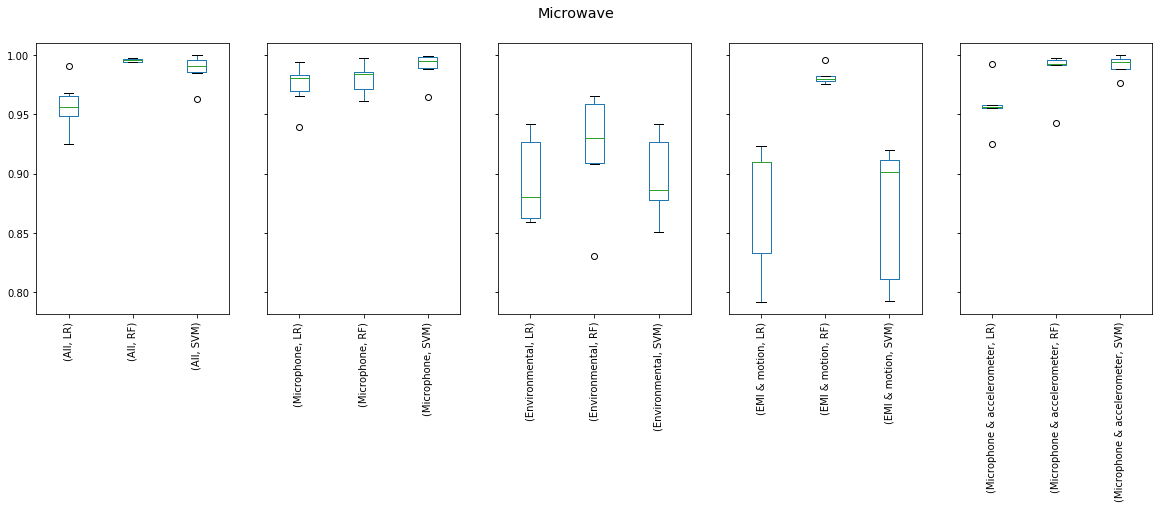

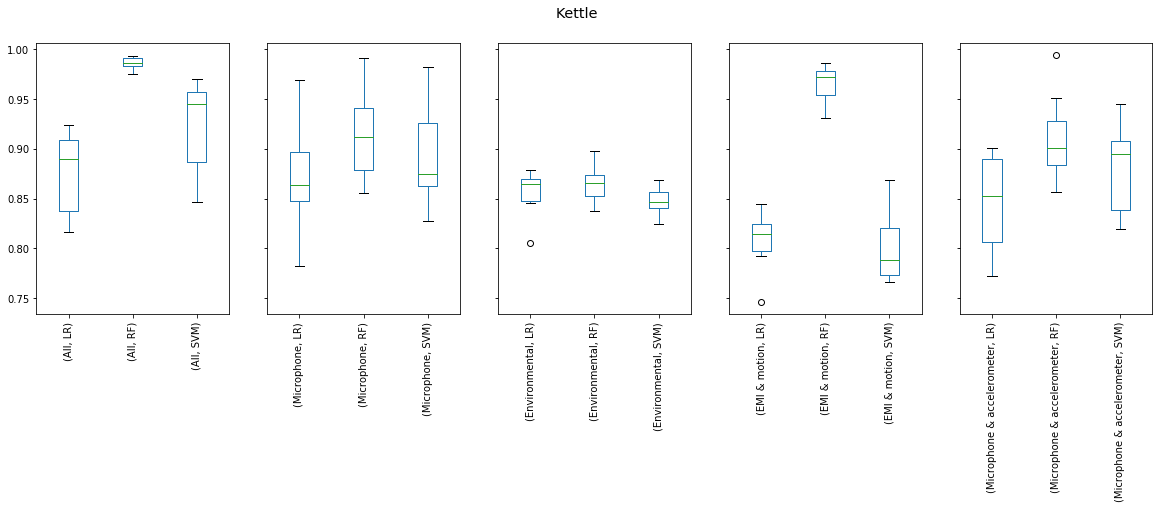

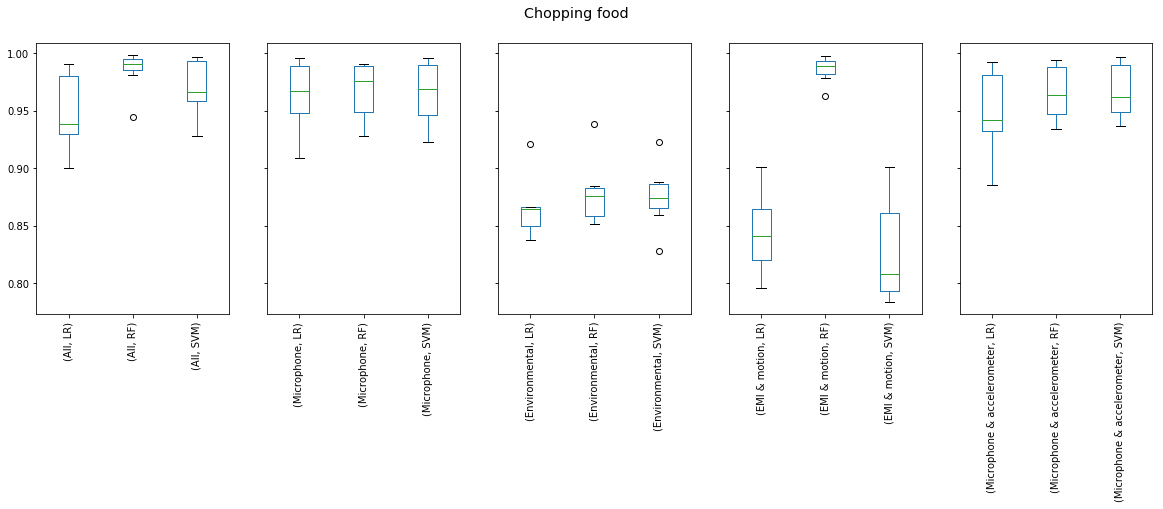

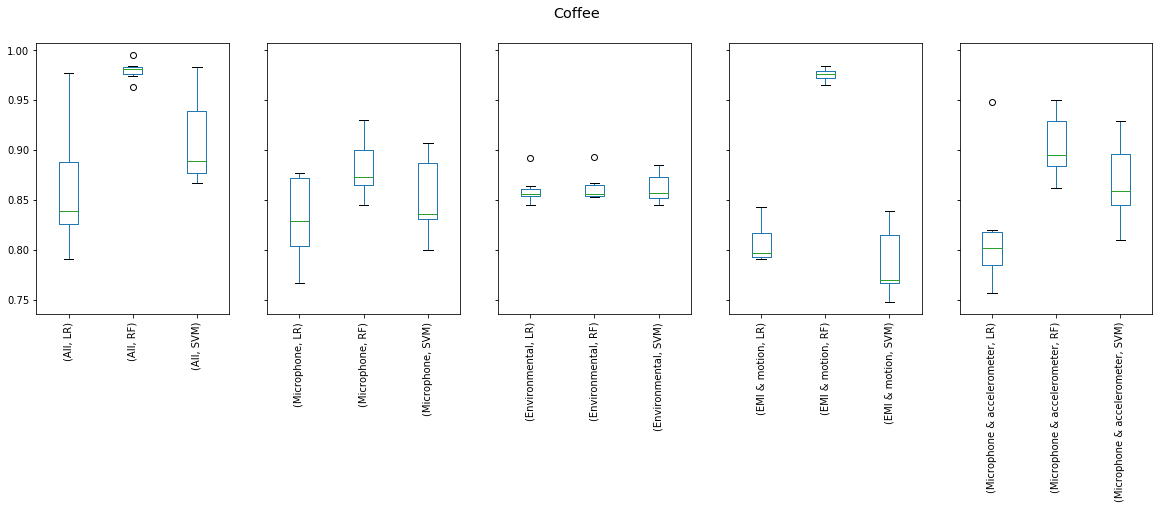

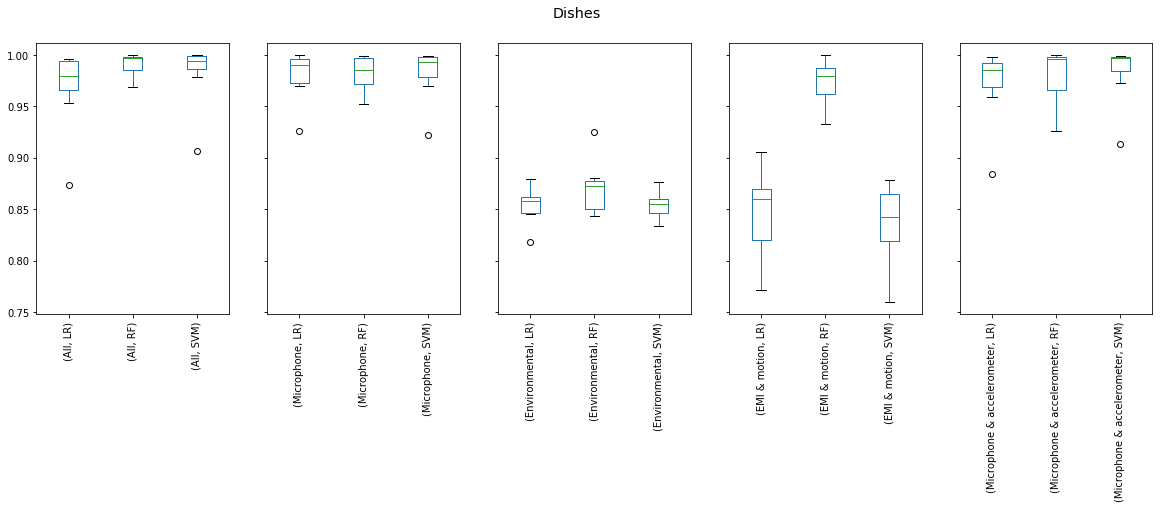

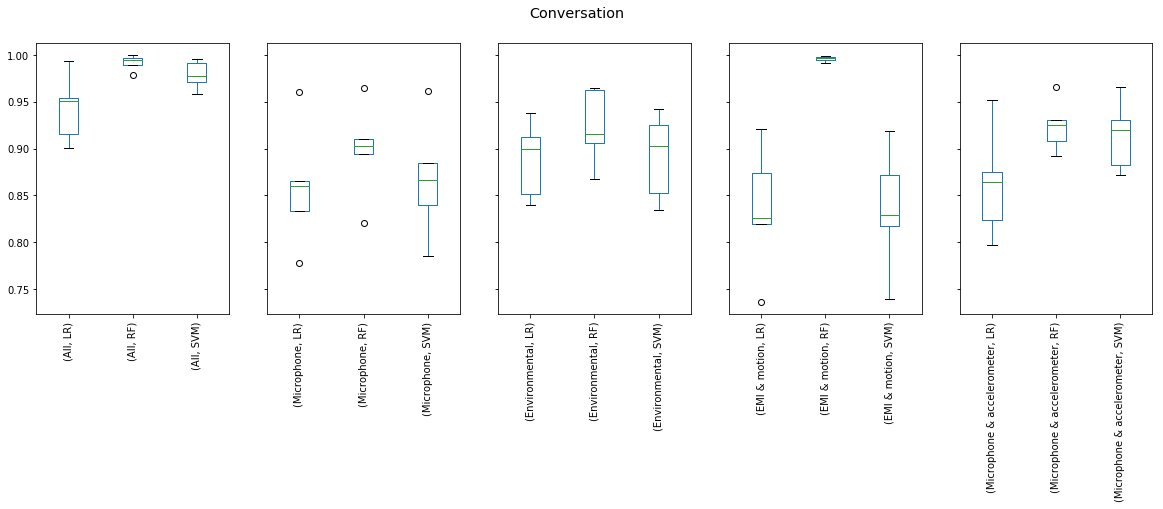

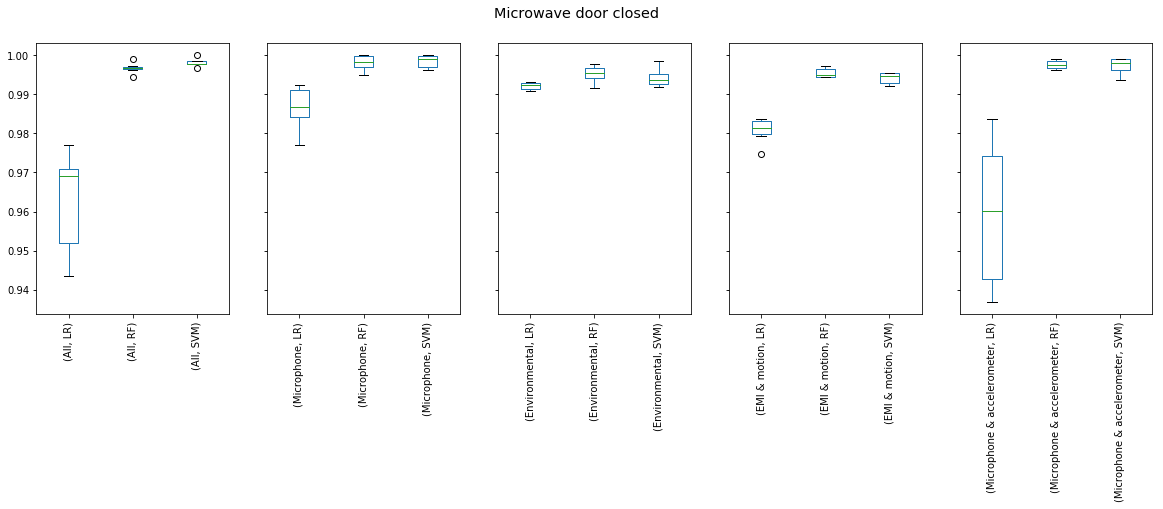

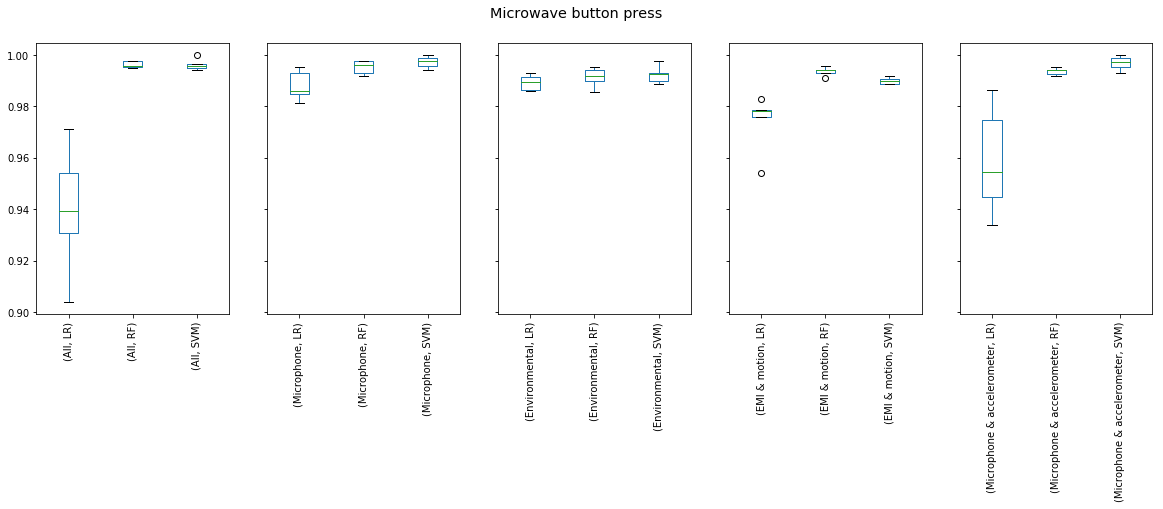

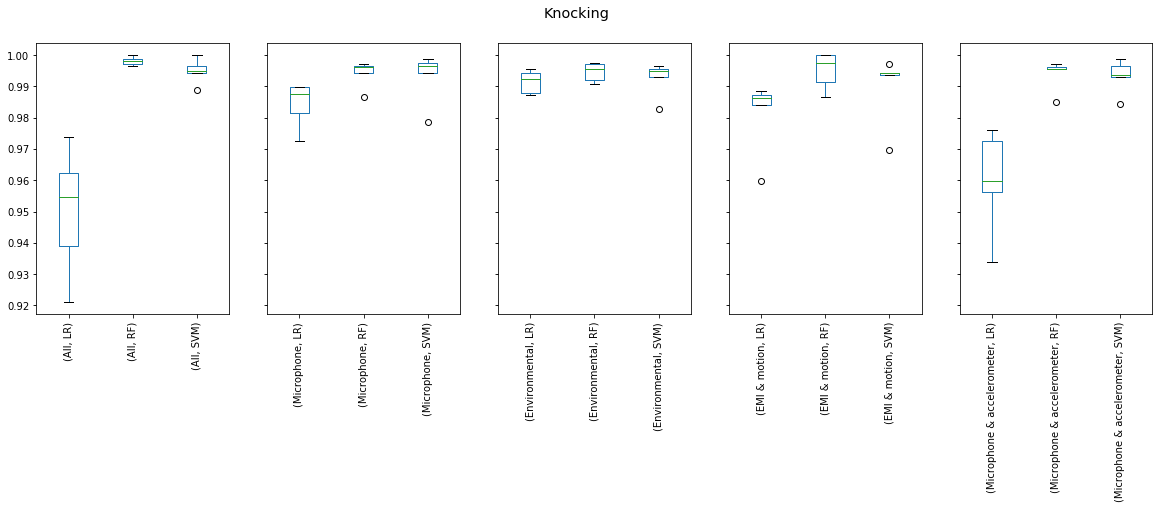

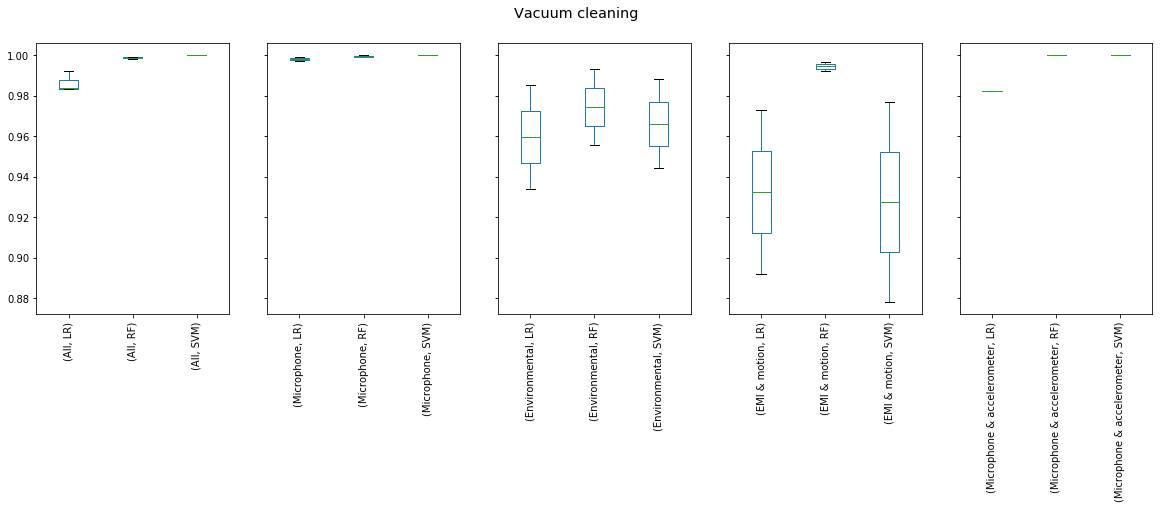

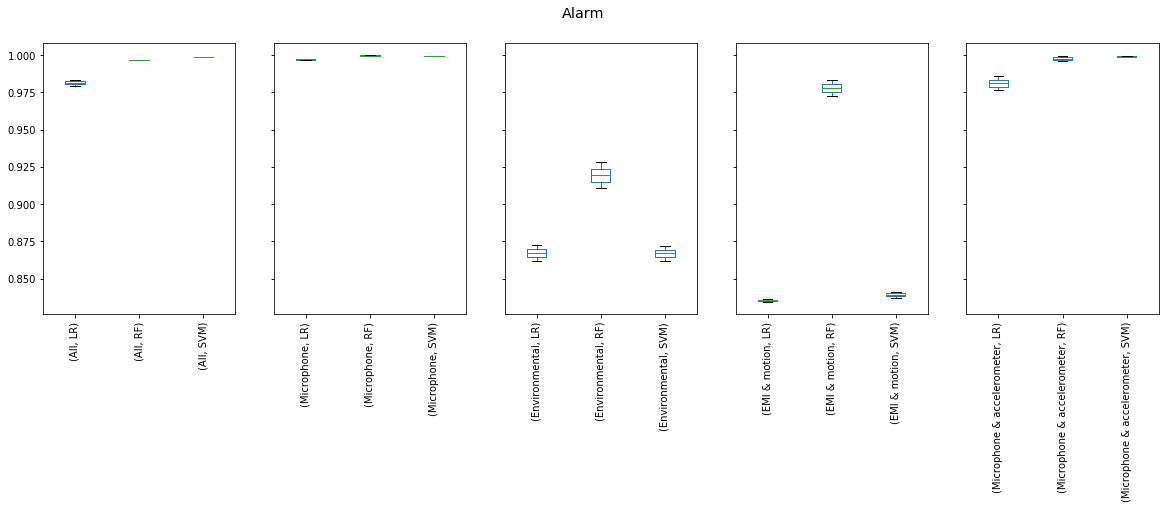

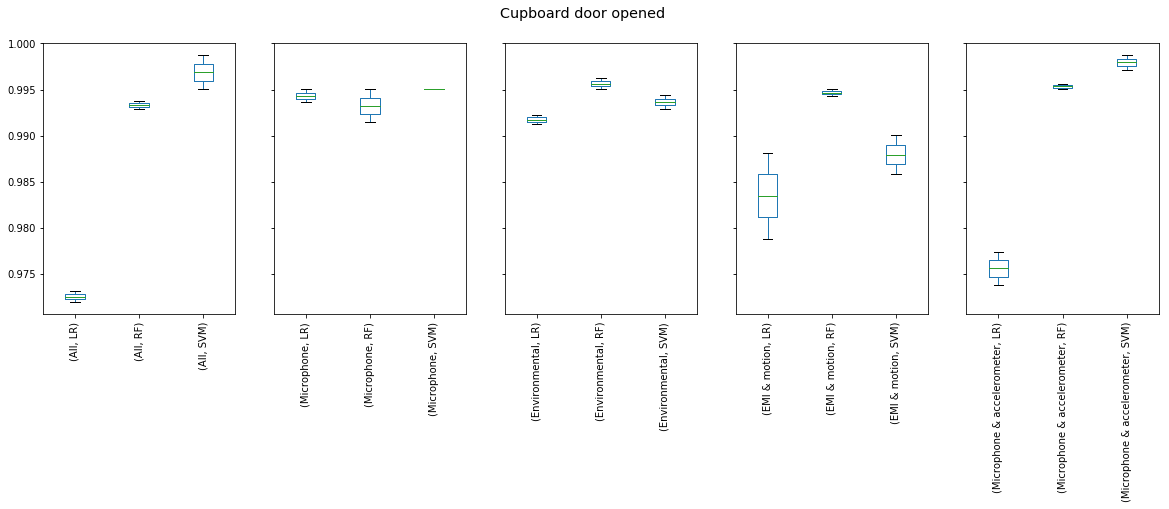

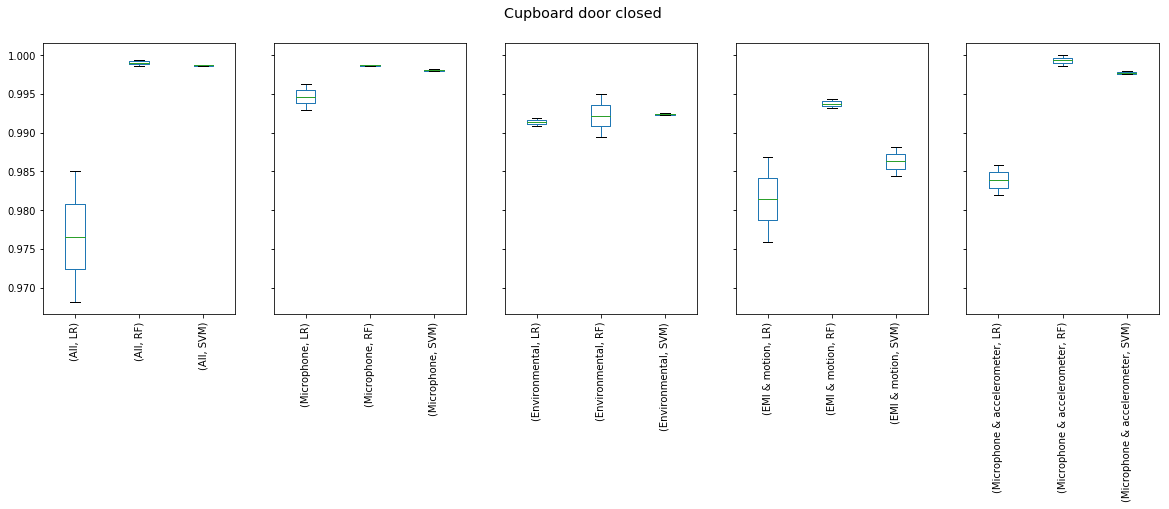

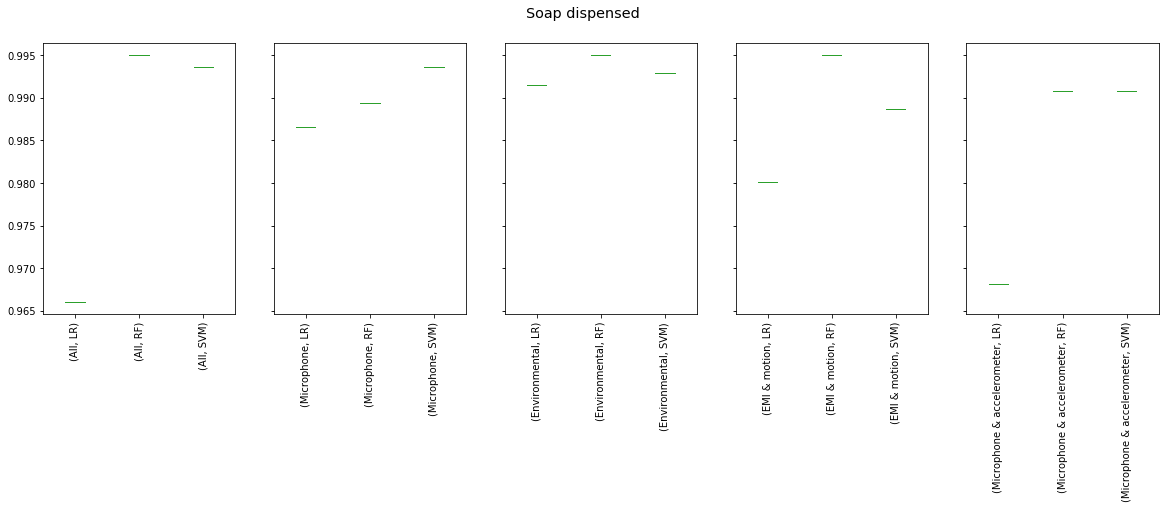

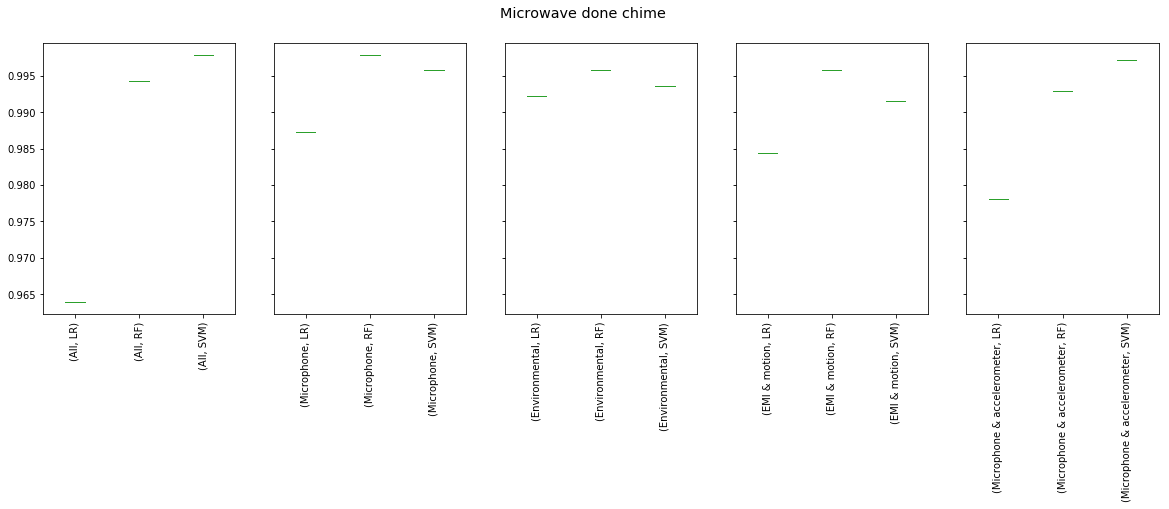

TypeError: Empty 'DataFrame': no numeric data to plot

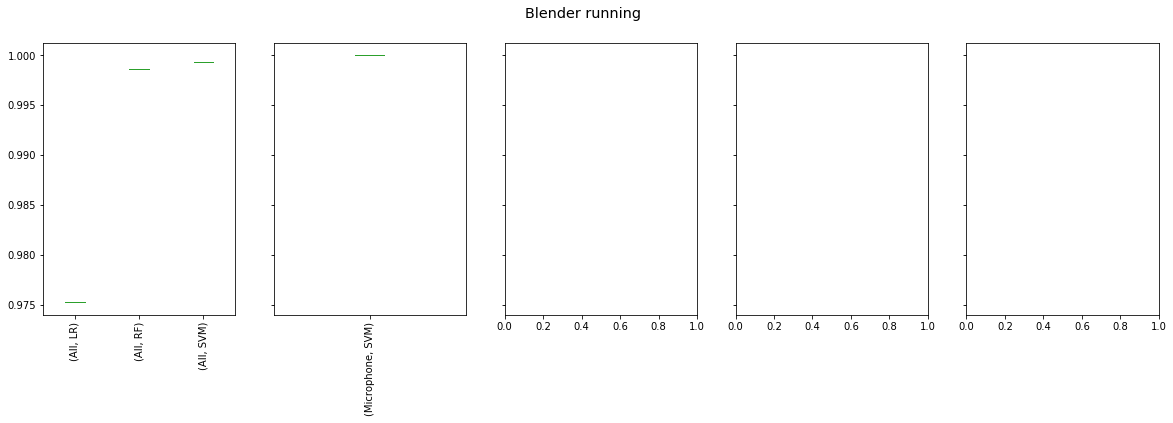

In [49]:
plt.rcParams["figure.figsize"] = (20, 5)
def classifier_boxplots_for_label(label):
    f, axes = plt.subplots(1, len(df['features'].unique()), sharex=False, sharey=True)
    
    plt.suptitle(label, fontsize="x-large")
#     fig = plt.figure()
#     st = fig.suptitle(label, fontsize="x-large")

    for i, features in enumerate(df['features'].unique()):
        ax = axes[i]
        df_ = df.loc[df.label == label]
        df_ = df_.loc[df_.features == features]
        df_['key'] = df_['source_room'] + '; ' + df_['source_device_name'] + '; ' + df_['features']

        df_ = df_[['classifier', 'accuracy', 'key']]
        df_ = df_.rename(columns={'accuracy': features})
        df_ = pd.pivot_table(df_, values=[features], columns=['classifier'], index=['key'])

        df_.plot.box(ax=ax)
        matplotlib.pyplot.sca(ax)
        plt.xticks(rotation='vertical')
#         ax.title(label + ' ' + features)

    plt.show()

for label in df['label'].unique():
    classifier_boxplots_for_label(label)